In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [31]:
data = pd.read_csv ('iris-dataset.csv')

data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
data_sepal = data[['sepal_length','sepal_width']]
data_petal = data[['petal_length','petal_width']]

In [33]:
data_sepal.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [34]:
data_petal.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [35]:
data_sepal.isnull().sum(axis=0)

sepal_length    0
sepal_width     0
dtype: int64

In [36]:
data_petal.isnull().sum(axis=0)

petal_length    0
petal_width     0
dtype: int64

Text(0,0.5,'petal_width')

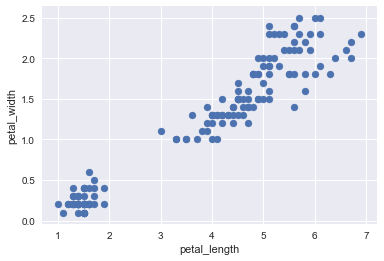

In [37]:
plt.scatter(data_petal['petal_length'],data_petal['petal_width'])
plt.xlabel('petal_length')
plt.ylabel('petal_width')

Text(0,0.5,'sepal_width')

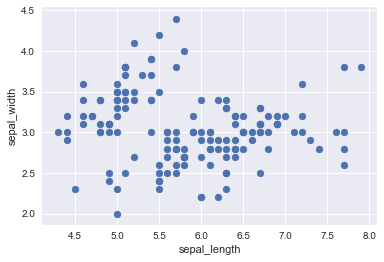

In [38]:
plt.scatter(data_sepal['sepal_length'],data_sepal['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

In [39]:
x = data_petal.copy()
x1 = data_sepal.copy()

In [53]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
clusters = x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

clusters.head()

,petal_length,petal_width,cluster_pred
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


Text(0,0.5,'petal_width')

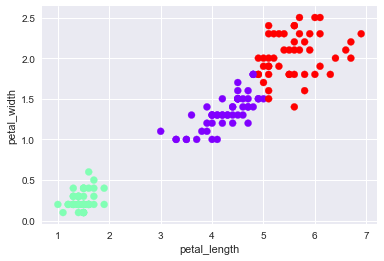

In [55]:
plt.scatter(data_petal['petal_length'],data_petal['petal_width'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('petal_length')
plt.ylabel('petal_width')

In [44]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)

In [45]:
wcss =[]

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

[300.0,
 54.145847013449895,
 18.046983891906272,
 12.307440251261847,
 9.175315740007754,
 7.215096212730808,
 6.022790511774206,
 5.177117863092621,
 4.426589153575175]

Text(0,0.5,'WCSS')

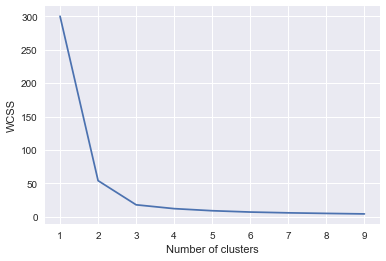

In [46]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [56]:
kmeans1 = KMeans(3)
kmeans1.fit(x1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [57]:
clusters = x1.copy()
clusters['cluster_pred']=kmeans.fit_predict(x1)

clusters.head()

,sepal_length,sepal_width,cluster_pred
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2
